In [1]:
import pandas as pd
import ta


In [2]:
df = pd.read_csv(r"C:\Users\ASUS\OneDrive\Desktop\code\datasets\btcusd_1-min_data.csv")
print(df.shape)
df[:5]

(7300477, 6)


,Timestamp,Open,High,Low,Close,Volume
0,1.325412e+09,4.58,4.58,4.58,4.58,0.0
1,1.325412e+09,4.58,4.58,4.58,4.58,0.0
2,1.325412e+09,4.58,4.58,4.58,4.58,0.0
3,1.325412e+09,4.58,4.58,4.58,4.58,0.0
4,1.325412e+09,4.58,4.58,4.58,4.58,0.0


In [3]:
df[df.isna()]

,Timestamp,Open,High,Low,Close,Volume
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
7300472,NaN,NaN,NaN,NaN,NaN,NaN
7300473,NaN,NaN,NaN,NaN,NaN,NaN
7300474,NaN,NaN,NaN,NaN,NaN,NaN
7300475,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.dropna(axis=0,inplace=True)
print(df.isna().sum())

Timestamp    0
Open         0
High         0
Low          0
Close        0
Volume       0
dtype: int64


In [6]:
df_safe = df.copy()
df_safe["Timestamp"] = pd.to_datetime(df_safe["Timestamp"], unit="s")
df_safe[:5]

,Timestamp,Open,High,Low,Close,Volume
0,2012-01-01 10:01:00,4.58,4.58,4.58,4.58,0.0
1,2012-01-01 10:02:00,4.58,4.58,4.58,4.58,0.0
2,2012-01-01 10:03:00,4.58,4.58,4.58,4.58,0.0
3,2012-01-01 10:04:00,4.58,4.58,4.58,4.58,0.0
4,2012-01-01 10:05:00,4.58,4.58,4.58,4.58,0.0


In [7]:
df_safe.sort_values('Timestamp',inplace=True)
df_safe.reset_index(drop=True,inplace=True)
df_safe[:5]

,Timestamp,Open,High,Low,Close,Volume
0,2012-01-01 10:01:00,4.58,4.58,4.58,4.58,0.0
1,2012-01-01 10:02:00,4.58,4.58,4.58,4.58,0.0
2,2012-01-01 10:03:00,4.58,4.58,4.58,4.58,0.0
3,2012-01-01 10:04:00,4.58,4.58,4.58,4.58,0.0
4,2012-01-01 10:05:00,4.58,4.58,4.58,4.58,0.0


In [8]:
df_safe.set_index('Timestamp',inplace=True)
df_safe[:5]

,Open,High,Low,Close,Volume
Timestamp,,,,,
2012-01-01 10:01:00,4.58,4.58,4.58,4.58,0.0
2012-01-01 10:02:00,4.58,4.58,4.58,4.58,0.0
2012-01-01 10:03:00,4.58,4.58,4.58,4.58,0.0
2012-01-01 10:04:00,4.58,4.58,4.58,4.58,0.0
2012-01-01 10:05:00,4.58,4.58,4.58,4.58,0.0


In [9]:
print(df_safe.shape)
df_small = df_safe[df_safe['Volume']>0]
print(df_small.shape)

(7300477, 5)
(5990017, 5)


In [16]:
df_small["rsi"] = ta.momentum.RSIIndicator(df_small["Close"]).rsi()#tells if buyers or sellers dominate 
df_small["ema_10"] = ta.trend.EMAIndicator(df_small["Close"], window=10).ema_indicator()#short-term trend but reacts quickly to recent price movements.
df_small["ema_50"] = ta.trend.EMAIndicator(df_small["Close"], window=50).ema_indicator()#EMA_50 captures long-term trend.EMA_10 crossing EMA_50 → strong buy/sell signal
df_small["macd"] = ta.trend.MACD(df_small["Close"]).macd()#Trend reversals,It measures trend momentum + trend reversal strength.
df_small["bb_high"] = ta.volatility.BollingerBands(df_small["Close"]).bollinger_hband()#These measure volatility.,Wider bands → high volatility
df_small["bb_low"] = ta.volatility.BollingerBands(df_small["Close"]).bollinger_lband()#Narrow bands → consolidation

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13600\582058139.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_small["rsi"] = ta.momentum.RSIIndicator(df_small["Close"]).rsi()#tells if buyers or sellers dominate
C:\Users\ASUS\AppData\Local\Temp\ipykernel_13600\582058139.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_small["ema_10"] = ta.trend.EMAIndicator(df_small["Close"], window=10).ema_indicator()#short-term trend but reacts quickly to recent price movements.
C:\Users\ASUS\AppData\Local\Temp\i

(5990017, 11)
(5989968, 11)


<Axes: xlabel='Timestamp'>

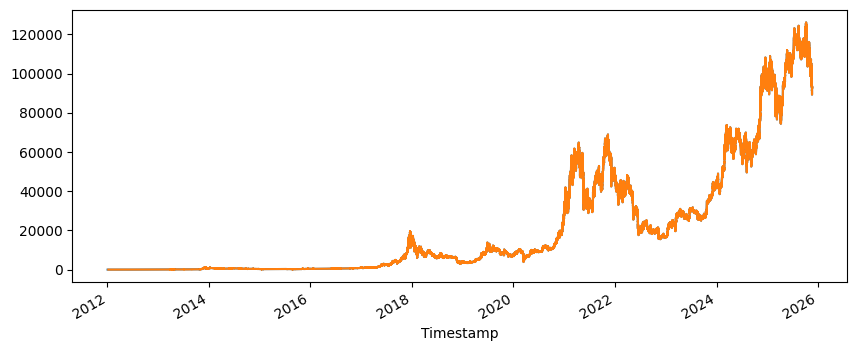

In [ ]:
print(df_small.shape)
df_small_safe = df_small.dropna()
print(df_small_safe.shape)
df_small_safe['Close'].plot(figsize=(10,4))

In [18]:
df_small_safe["target"] = df_small_safe["Close"].shift(-1)
df_small_safe.dropna(inplace=True)
print(df_small_safe.shape)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_13600\1623045806.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_small_safe["target"] = df_small_safe["Close"].shift(-1)


(5989967, 12)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_13600\1623045806.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_small_safe.dropna(inplace=True)


In [19]:
df_small_safe.to_csv('cleaned_data.csv',index=False)

In [5]:
df = pd.read_csv(r"C:\Users\ASUS\OneDrive\Desktop\code\serious_projects\Stock Price Prediction\model_prep\data\cleaned_data.csv")
df[:2] 

,Open,High,Low,Close,Volume,rsi,ema_10,ema_50,macd,bb_high,bb_low,target
0,6.4,6.4,6.4,6.4,0.838760,53.711911,6.507669,6.021988,0.154531,6.820272,6.249728,6.4
1,6.4,6.4,6.4,6.4,9.110853,53.711911,6.488093,6.036812,0.134631,6.821593,6.242407,6.3


In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_cols = ["Open","High","Low","Close","Volume","rsi","ema_10","ema_50","macd","bb_high","bb_low"]
df[scaled_cols] = scaler.fit_transform(df[scaled_cols])
df[:2]

,Open,High,Low,Close,Volume,rsi,ema_10,ema_50,macd,bb_high,bb_low,target
0,0.000021,0.000021,0.000021,0.000021,0.000143,0.533406,0.000018,0.000012,0.516982,0.000018,0.000018,6.4
1,0.000021,0.000021,0.000021,0.000021,0.001556,0.533406,0.000017,0.000013,0.516975,0.000018,0.000018,6.3


In [7]:
df["lag_1"] = df["Close"].shift(1)
df["lag_2"] = df["Close"].shift(2)
df["lag_3"] = df["Close"].shift(3)
df["rolling_7"] = df["Close"].rolling(7).mean()
df["rolling_14"] = df["Close"].rolling(14).mean()
df["rolling_std_7"] = df["Close"].rolling(7).std()
df = df.dropna()


In [8]:
tree_features = [
    "Open","High","Low","Close","Volume",
    "rsi","ema_10","ema_50","macd",
    "bb_high","bb_low",
    "lag_1","lag_2","lag_3",
    "rolling_7","rolling_14","rolling_std_7"
]

X_tree = df[tree_features].values
y_tree = df["target"].values


In [9]:
X_tree[:2]

array([[2.45645342e-05, 2.45509162e-05, 2.45731018e-05, 2.45645342e-05,
        2.60011693e-04, 6.44609470e-01, 1.97980293e-05, 1.45617069e-05,
        5.16988402e-01, 2.10627693e-05, 1.56672091e-05, 2.45645342e-05,
        2.45645342e-05, 2.45645342e-05, 2.46777348e-05, 2.23005218e-05,
        2.99500685e-07],
       [2.45645342e-05, 2.45509162e-05, 2.45731018e-05, 2.45645342e-05,
        1.19452755e-04, 6.44609470e-01, 1.99721449e-05, 1.47534756e-05,
        5.16988175e-01, 2.10627693e-05, 1.56672091e-05, 2.45645342e-05,
        2.45645342e-05, 2.45645342e-05, 2.46777348e-05, 2.25835234e-05,
        2.99500685e-07]])

In [11]:
y_tree[:2]

array([6.9, 6.5])